# Estimação de Demanda por Aluguel de Bicicletas

## Resumo
Nesse estudo vamos mostra a efetividade de uma rede neural para estimar a demanda de por aluguel de bicicletas. Nós nos inspiramos livremente no experimento feito pelo time [AzureML](https://gallery.cortanaintelligence.com/Home/Author?authorId=151C1FC0FFA9AE788F7872766C4076EA49F8EDD487E674688F98D8F77E22FA4B), onde os autores mostram a efetividade de engenhar novas variáveis para alavancar o poder preditivo de algoritmos de Aprendizado de Máquina clássicos. No nosso estudo, propomos uma alternativa com modelos de aprendizado de representações, no qual dispensamos completamente qualquer forma de engenharia de variáveis a mão e delegamos essa etapa do aprendizado à maquina.

## Dados
Utilizaremos dados da companhia *Capital Bikeshare*, que opera serviços de aluguel de bicicleta na cidade de  Washington DC, EUA. Os dados são públicos e podem ser encontrados [aqui](https://www.capitalbikeshare.com/system-data). Particularmente, utilizamos uma [base de dados já tratada](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) (Fanaee-T, Hadi, and Gama, Joao, 2013), que contém o registro de demanda a cada hora, totalizando 17389 observações ao longo dos anos de 2011 e 2012. Além dos registros de demanda, a base também traz informações meteorológicas do momento do registro e indicadores de dia útil ou feriado.  


## Trabalhos Relacionados
O presente estudo se baseia livremente no experimento *Regression: Demand estimation*, disponível na [Cortana Intelligence Gallery](https://gallery.cortanaintelligence.com/). Nele, os autores utilizam uma *ensemble* de Árvores de Decisão Impulsionadas para prever a demanda corrente por aluguel de bicicletas. A base de dados utilizada foi a [*Bike Rental UCI*](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset), descrita acima. O time da Microsoft optou port utilizar primeiro ano de registros (2011) como set de treinamento, reservando as observações de 2012 para teste. Além disso, as variáveis categóricas foram codificadas como *dummies*. A partir daí, para mostrar a eficácia de engenharia de características, os autores montaram 3 bases de dados diferentes:  

    A)  A primeira base continha apenas as variáveis originais. Nessa base, foi obtido um erro absoluto médio de 89,7.   
    
    B)  A segunda base continha as variáveis originais mais a quantidade demandada em cada uma das últimas 12 horas. Nessa base, foi obtido um erro absoluto médio de 51,7.
    
    C) As variáveis de A. e B. mais a demanda de cada um dos últimos 12 dias, para a mesma hora. Nessa base, foi obtido um erro absoluto médio de 47,6.
    
    D) As variáveis de A., B. e C. mais a demanda de cada uma das últimas 12 semanas, para a mesma hora e durante o mesmo dia. Nessa base, foi obtido um erro absoluto médio de 48,3.
    
O experimento pode ser integralmente conferido [aqui](https://gallery.cortanaintelligence.com/Experiment/Regression-Demand-estimation-4).


### Semelhanças e diferenças entre o estudo presente e o produzido pelo time AzureML
Da mesma forma que no estudo resumido acima, utilizamos os dados de 2011 para treinar o modelo e os dados de 2012 para avaliação. No entanto, não usamos nenhuma forma de engenharia de variáveis, nem sequer codificamos as variáveis categóricas para *dummies*.

Uma outra diferença notável é que o estudo realizado pelo time AzureML utilizava as variáveis originais de uma hora para prever a demanda nesta mesma hora, ou seja, fez-se uma estimativa da **demanda corrente** a partir das variáveis correntes (no caso A.) e das variáveis passas (no outros casos). Na prática, estamos mais interessados em estimar a **demanda futura** a partir de variáveis correntes e passadas. Assim, nosso estudo propõe estimativas de demanda para diversas distâncias no futuro: 1 hora à frente, 12 horas à frente e 24 horas à frente. 


## Aprendizado de Representações
Em Aprendizado de Máquina clássico, um problema que sempre aparece independente do algoritmo utilizado é que a tarefa mais difícil não é treinar a máquina, mas sim descobrir e engenhar novas variáveis que auxiliem no aprendizado. O estudo *Regression: Demand estimation*, diponível na *Cortana Intelligence Gallery* mostra como esse tipo de engenharia melhora o poder preditivo, mas há também que se considerar a enorme quantidade de esforço mental e tempo que geralmente é gasto nesse processo de pré-processamento dos dados.

Os modelos de *Deep Learning* surgem como forma de resolver esse problema: em vez de necessitarem de alguém para criar variáveis representativas manualmente, faz-se o uso de redes neurais profundas, que são capazes de aprendê-las sozinhas. Em distinção ao aprendizado de máquina clássico, as redes neurais profundas fazem parte de novo tipo de aprendizado de máquina, que leva o nome de **aprendizado de representações**. Com essas técnicas, além de aprender um mapeamento entre características representativas e um output desejado, a máquina consegue aprender as próprias características representativas de maneira automática.

Uma rede neural artificial profunda é quando aninhamos diversas transformações lineares seguida por alguma função não linear diferenciável, que é aplicada elemento a elemento da matriz de entrada. Seja $\phi$ alguma transformação não linear (normalmente a função linear retificada, sigmóide ou tangente hiperbólica), a representação de uma rede neural profunda (com apenas duas camadas de profundidade) pode ser descrita da seguinte forma: 

$$\pmb{y} = \phi(\phi(\pmb{X}\pmb{W}_1)\pmb{W}_2)\pmb{w} + \pmb{\epsilon}$$

A parte $\phi(\phi(\pmb{X}\pmb{W}_1)\pmb{W}_2)$ da rede neural é reposnável por aprender as novas variáveis ou representações, que podemos denotar por $\pmb{X^*}$. Em seguida, simplesmente utilizamos essas representações em conjunto com algum modelo linear:

$$\pmb{y} = \pmb{X^*}\pmb{w} + \pmb{\epsilon}$$

Uma outra forma de representar as redes neurais profundas são por meio de grafos:

<img src="book_imgs/ANN_graf.gif">


Podemos pensar nas diversas camadas de uma rede neural como aprendendo níveis de abstrações hierárquicos. Em reconhecimento de imagens, por exemplo, podemos pensar nas camadas mais baixas (próximas aos inputs) como aprendendo a detectar traços e variação de luminosidade, enquanto que as camadas superiores aprendem a juntar esses traços em partes de objeto, que então podem ser utilizadas por um modelo linear para discriminar entre um ou outro objeto.

O tipo de de rede neural descrito acima faz parte da classe de **redes neurais feedforward**, pois todas as conexões da rede são adiante, isto é, não há conexões que vão para a mesma camada ou para uma cada anterior.

### Redes Neurais e informação distribuída no tempo
Com uma arquitetura de **redes neurais feedforward** cada observação dos dados flui de maneira independente pela rede. Portanto, não podemos esperar que esse tipo de rede consiga detectar que a demanda observada no passado possa ser um bom indicativo da demanda futura. Em termos mais técnicos, podemos dizer que as redes neurais feedforward assumem que os dados são independentes e identicamente distribuídos (i.i.d.). Em séries temporais, como no nosso caso de estimação de demanda, isso certamente não é o caso, pois a demanda observada no passado é um ótimo indicador para a demanda observada no futuro. Em termos mais simples, podemos dizer que as redes neurais feedforward não tem nenhum mecanismo de memória.

Existem algumas forma de abordar esse problema e para entendê-las é preciso antes compreender como a informação temporal é codificada. Nós podemos pensar nesse tipo de informação como uma grade, na qual as colunas são as diferentes horas (ou períodos de tempo, no geral) e as linhas são as variáveis. O tempo então evolui da esquerda para a direita. Por exemplo, a representação em grade de três dias de informação pode ser representada na imagem a seguir, com cada linha representando uma variável:

<img src="book_imgs/time_gridjpg.jpg">

Agora toda a informação de 3 dias está capturada nessa grade. Por exemplo, nas duas últimas linhas de cada imagem, vemos a demanda daquela hora por pessoas cadastradas no sistemas e por usuários casuais. Podemos ver que há picos de demanda e se olharmos para a linha que representa as horas poderemos ver que esses picos acontecem no meio do dia e no fim da tarde, para usuários registrados e em dias úteis. Nós também podemos ver que a demanda de usuários casuais acontece principalmente nos dias de feriado ('workingday' marcado com preto) e praticamente desaparece nos dias úteis.

Com isso, nós poderemos agora achatar toda essa grade e alimentá-la como uma observação para a rede neural feedforward. Nós então procedemos normalmente, requirindo que a partir dessa grade de informação seja prevista uma demanda $y$ em algum período futuro.


Isso permite à rede captar informações do passado, mas não induz nenhum conhecimento sobre a dependência temporal; nós então só poderemos esperar que a rede aprenda essa dependência sozinha. Há ainda um problema de armazenagem, uma vez que redes neurais feedforward são muito abundante em parâmetros. Como temos 13 variáveis, se quisermos capturar apernas um dia (24 horas) de informação passada e utilizarmos apenas 10 neurônios na primeira camada oculta já teramos 3120 (24x13x10) parâmetros para aprender; se quisermos utilizar 3 dias de informação e 100 neurônios, essa quantidade de parâmetros já sobe para 93600, apenas para a primeira camada!

Uma outra possibilidade, mais razoável, é utilizar redes neurais convolucionais, um tipo de rede neural feedforward que compartilha parâmetros e ainda induz um conhecimento a priori de que os dados estão organizados em grade. Com essas redes, é possível passar uma grade de neurônios (chamada kernel) ao longo da grade temporal. Essa grade de neurônios então observa diferentes locais da grade temporal, podendo detectar padrões de dependência entre um período e outro. Como os neurônios do kernel compartilham parâmetros, isso reduz de maneira drástica a quantidade deles que teremos de armazenar.

Nós optaremos por uma terceira alternativa, que nós permite observar um período de cada vez. Assim, em vez de apresentarmos à rede toda a grade de informação temporal, poderemos mostrar cada coluna (cada hora) individualmente. Assim, o tamanho do input à rede fica fixo no número de variáveis (13 nesse caso) e a quantidade de parâmetros cresce apenas com a quantidade de neurônios que utilizarmos e não mais também com o horizonte temporal que queremos considerar. Mas para isso, precisaremos abandonar a arquitetura feedforward da rede neural.

### Redes Neurais Recorrentes
O nosso objetivo é, a partir da sequência de observações passadas, prever uma demanda futura. Seria etão extremamente útil se pudéssemos criar algum mecanismo de memória na rede neural, de forma que ela consiga utilizar acontecimentos em diferentes níveis de passado para inferir sobre o futuro. Para isso, vamos utilizar uma rede neural recorrente (RNR), isto é, que tenha conexões que saem e levam de volta na mesma camada. Dessa forma, a rede consegue captar acontecimentos em períodos passados e redirecioná-los para o período que esta sendo processado no momento. 

Uma rede neural recorrente pode ser vista como uma redes neurais feedforward muito profunda, que se desenrola no tempo e capta informações de diferentes períodos. 

<img src="book_imgs/RNN.png">

A cada período de tempo, a rede capta a informações correntes pelas conexões que levam do input à camada oculta. Além disso, por meio das conexões recorrentes, a rede consegue capturar a informação do que aconteceu nos períodos passados. Ao visualizar a RNR desenrolada no tempo, é preciso notar que os parâmetros que conectam com o passado - os parâmetros da conexão recorrente - são sempre os mesmos. Isto significa que não há aumento de parâmetros serem aprendidos se passamos a rede uma sequencia temporal mais comprida.

Redes neurais recorrentes são particularmente difíceis de treinar porque é comum que passo na otimização iterativa em direção ao mínimo se desvaneça em um valor muito pequeno, fazendo com que a rede não consiga aprender informações de dependências remotas no passado. Para possibilitar à RNR o aprendizado dessas dependências, é necessário substituir os neurônios tradicionais por alguma célula de memória. No presente estudo, utilizamos a célula LSTM (Long Short-Term Memory), que essencialmente dá a rede neural à possibilidade de escolher quando armazenar informação passada, quando esquecer a informação armazenada e quando utilizá-la para inferência. Para mais detalhes sobre o funcionamento de RNR com LSTM, sugerimos [esse artigo](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

### O Modelo
Nossa rede neural recorrente para previsão de demanda será o mais simples possível. Assim como na imagem acima, vamos utilizar apenas uma camada oculta entre os inputs e os outputs. O número de células nessa camada oculta será 256. Para agilizar o aprendizado, vamos limitar o tamanho da sequência temporal apresentada à rede para 3 dias (72 horas); após observar 72 horas sucessivas de demanda por aluguel de bicicleta, a rede neural fará uma previsão para a demanda futura. Nós então compararemos essa previsão com valor observado e minimizaremos a distância quadrada entre os dois.

Formalmente, o modelo pode ser sintetizado na forma:

$$ \pmb{h}_t = tanh(\pmb{W}_h \pmb{x}_t + \pmb{U}_h\pmb{h}_{t-1} + \pmb{b}_h) $$

$$ \pmb{y}_{t+n}=\pmb{W}_y \pmb{h}_t + \pmb{b}_y $$

    * Em que $\pmb{h}_t$ é o estado corrente da camada oculta;
    * $\pmb{x}_t$ são os inputs que a rede observa no momento;
    * $\pmb{W}_h$ e $\pmb{b}_h$ são os parâmetros das conexões entre os inputs e a camada oculta;
    * $\pmb{U}_t$ são os parâmetros das conexões recorrentes;
    * $\pmb{h}_{t-1}$ é o estado da camada oculta no período anterior;
    * $ \pmb{W}_y$ e $\pmb{b}_y$ são os parâmetros das conexões entre a camada oculta e o output;
    *$ tanh$ é a função tangente hiperbólica.
    
Para treinar o modelo, utilizamos backpropagation através do tempo e o otimizador Adam, uma variação do algoritmo de Gradiente Descendente Estocástico, com taxa de aprendizado adaptativa e momento. Para o modelo que prevê a demanda uma hora adiante, foram realizadas 15 mil iterações de treino; para o modelo que prevê a demanda 12 e 24 horas a diante, foram realizadas 35 mil iterações de treino.

Nós inicializamos os parâmetros $\pmb{W}$ segundo sugerido por Glorot and Bengio (2010), isto é, seguindo uma distribuição uniforme tal que $\pmb{W}_{ij}\sim U(-\sqrt{\frac{6}{k+m}}, -\sqrt{\frac{6}{k+m}})$, onde $k$ é a quantidade de entradas e $m$ é a quantidade da saídas da camada. Também adicionamos *dropout* padrão para evitar um super-ajustamento muito severo.

# Programa
Em primeiro lugar, vamos carregar as dependências necessárias preparar o ambiente.

In [1]:
import pandas as pd # para carregar os dados
import numpy as np # para computação numérica
import tensorflow as tf # para AM
from matplotlib import pyplot as plt # para gráficos
from time import time # para cronometras
import os # para criar checkpoits

# para consistência de resultados
tf.set_random_seed(1)
np.random.seed(1)

# criando o diretório de checkpoints
save_dir = 'BIKEcheckpoints/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

Agora, vamos carregar os dados e criar a variável que queremos prever: a demanda futura.

In [2]:
batch_size = 128 # tamanho do mini-lote
n_steps = int(24*3) # tamanho máximo da sequência
pred_ahead = 1 # horas a frente para prever a demanda
#pred_ahead = 12
#pred_ahead = 24

# hiper-parâmetros de aprendizado
lr = 0.001
train_iters = 10001
restore=False

# leitura da base de dados
bike_data = pd.read_csv('/media/matheus/Elements/data/Bike-Sharing-Dataset/hour.csv')

# formatação como série temporal
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'], format='%Y-%m-%d')
bike_data.set_index('dteday', inplace=True)

# cria a variável target e retira variáveis que não ajudam
bike_data['label'] = bike_data.shift(-pred_ahead).ix[:, 'cnt']
bike_data.drop(['instant', 'mnth', 'yr', 'registered',
                'season', 'holiday','weekday', 'casual',
               'temp', 'atemp', 'hum', 'windspeed'], axis=1, inplace=True)
bike_data = bike_data.ix[:bike_data.shape[0] - pred_ahead, :]

bike_data.tail()

,hr,workingday,weathersit,cnt,label
dteday,,,,,
2012-12-31,18,1,2,122,119.0
2012-12-31,19,1,2,119,89.0
2012-12-31,20,1,2,89,90.0
2012-12-31,21,1,1,90,61.0
2012-12-31,22,1,1,61,49.0


Para manter o código de treinamento limpo, vamos também criar um *wraper* de dados que nos fornece os mini-lotes com a sequências necessárias para treino.

In [3]:
class data(object):
    
    def __init__(self, dataset, n_steps, batch_size):
        self.n_steps = n_steps # tamanho máximo da sequência
        self.batch_size = batch_size # tamanho do mini-lote
        self.bc = 0 # inicia o contador de mini-lotes

        X, y = [], [] # monta um mini-lote
        for i in range(dataset.shape[0]):
            print 'Segmentando lote %d' % i, '   \r',
            if i >= dataset.shape[0] - n_steps:
                break
            # monta a grade temporal
            X.append(dataset.ix[i:i+n_steps, dataset.columns != 'label'].values)
            y.append(dataset.ix[i+n_steps-1, 'label'])
        
        X, y = np.array(X), np.array(y)
        
        # Cria um indexador para os sets de treino e teste
        idxt = (dataset.index < '2012-01-01')[:dataset.shape[0] - n_steps]
        
        # separa dados de treino e teste
        self.X_train, self.y_train = X[idxt], y[idxt]
        self.X_test, self.y_test = X[np.logical_not(idxt)], y[np.logical_not(idxt)]
                
        # embaralha os dados de treino de maneira consistente
        rng_state = np.random.get_state()
        np.random.shuffle(self.X_train)
        np.random.set_state(rng_state)
        np.random.shuffle(self.y_train)
        
         
    # função para pegar o próximo mini-lote de treino
    def get_next_train_batch(self):
        # cria a divisão do mini-lote
        offset = (self.bc * self.batch_size) % (self.y_train.shape[0] - self.batch_size)
        
        # monta os mini-lotes
        batch_data = self.X_train[offset:(offset + self.batch_size), :, :]
        batch_label = self.y_train[offset:(offset + self.batch_size)]
        self.bc += 1 # atualiza o contador de mini-lotes 
        return batch_data, batch_label 

# envolve os dados e mostra o formato dos dois sets
format_data = data(bike_data, n_steps, batch_size)
print 'Formato do set de treino: ', format_data.X_train.shape, format_data.y_train.shape
print 'Formato do set de teste: ', format_data.X_test.shape, format_data.y_test.shape 

Formato do set de treino:  (8645, 72, 4) (8645,)                                                          
Formato do set de teste:  (8661, 72, 4) (8661,)


É sempre bom algum tipo de análise visual para termos certeza de que os dados foram processados corretamente. Abaixo, vamos plotar 9 grades temporais.

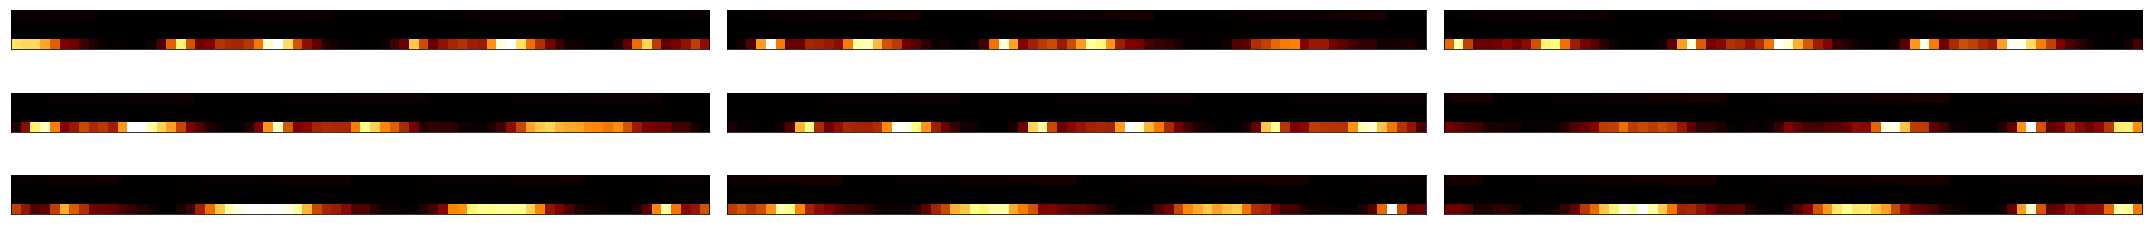

In [4]:
def plot_images(images, cmap='afmhot'):
    assert len(images) == 9 # garante que 9 imagens foram passadas
    
    # Cria gráfico 3x3
    fig, axes = plt.subplots(3, 3, figsize=(30,4))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)

    for i, ax in enumerate(axes.flat):
        # plota a imagem
        ax.imshow((images[i]).T, cmap=cmap)
        ax.set_xticks([])
        ax.set_yticks([])
    
    # mostra as grades temporais
    plt.tight_layout()
    plt.show()

idx = np.random.randint(0, 5000, 9) # selecion nove grades aleatórias para plotar
plot_images(format_data.X_test[idx])

Agora vamos construir nosso modelo de rede neural recorrente como um grafo TensorFlow

In [5]:
# hiper_parametros da rede
n_inputs = format_data.X_train.shape[-1] # quantidade de variáveis dos inputs
n_hidden_units = 256 # números de células de memória
n_classes = 1 # quantidade de saída
drop_prob = 0.6 # probabilidade de manter no dropout

# inputs ao grafo
x = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_classes]) 
tf_drop = tf.placeholder(tf.float32)

# modelo de RNR
def RNN(X):
    
    # Camada de entrada
    # Modifica o formato dos inputs para multiplicação de matriz eficiente
    # X ==> (mini-lote * passos na sequência, variáveis)
    with tf.name_scope('inputs_to_hidden'):
        X = tf.reshape(X, [-1, n_inputs])
        
        # cria os parâmetros com inicialização xavier
        Ws_in = tf.get_variable(shape=[n_inputs, n_hidden_units],
                                initializer=tf.contrib.layers.xavier_initializer(seed=0),
                                name='Ws_in')
        # cria o viés
        bs_in = tf.get_variable(shape=[n_hidden_units],
                                initializer=tf.constant_initializer(0.0),
                                name='bs_in')
        # Aplica tranformação linear
        X_in = tf.matmul(X, Ws_in) + bs_in
    
    # Camada oculta
    with tf.name_scope('LSTM_Cell'):
        
        # Reformata os inputs de volta ao formato de sequência
        X_in = tf.reshape(X_in, [-1, n_steps, n_hidden_units])

        # Cria as células LSTM e adiciona dropout apenas à saida da camada
        lstml_cell = tf.nn.rnn_cell.BasicLSTMCell(n_hidden_units, forget_bias=1.0,
                                                state_is_tuple=True)
        lstml_cell = tf.nn.rnn_cell.DropoutWrapper(lstml_cell, output_keep_prob=tf_drop,
                                                  seed=0)
        
        # Passa os inputs às células, uma hora de cada vez
        outputs, final_state = tf.nn.dynamic_rnn(lstml_cell, X_in,
                                                 dtype=tf.float32, time_major=False)

        # Coleta os outputs da camada oculta
        outputs = tf.unpack(tf.transpose(outputs, [1, 0, 2]))
        
        # cria os parâmetros da camada de saída com inicialização xavier
        Ws_out = tf.get_variable(shape=[n_hidden_units, n_classes],
                                initializer=tf.contrib.layers.xavier_initializer(seed=0),
                                name='Ws_out')
        # cria os viéses da camada de saída
        bs_out = tf.get_variable(shape=[n_hidden_units],
                                initializer=tf.constant_initializer(0.0),
                                name='bs_out')
        
        # aplica tranformação linear para gerar o output
        results = tf.matmul(outputs[-1], Ws_out) + bs_out

    return results

# cria o modelo
pred = RNN(x)

# define a função objetivo como sendo o erro quadrático médio
cost = tf.reduce_mean(tf.pow(pred - y, 2))

# define um marcador de iterações e a operação de treino
global_step = tf.Variable(initial_value=0, name='global_step', trainable=False)
train_op = tf.train.AdamOptimizer(lr).minimize(cost, global_step=global_step)

# define a métrica de erro como a média do erro absoluto 
accuracy = tf.reduce_mean(tf.abs(pred - y))

# cria um objeto para salvar o modelo
saver = tf.train.Saver()

Finalmente, vamos executar o grafo acima para treinar nossa rede neural.

In [6]:
# abre uma sessão tensorflow
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # inicializa os parâmetros
    
    # carrega o modelo salvo, se for o caso
    if restore:
        ckpt = tf.train.get_checkpoint_state(save_dir)
        saver.restore(sess, ckpt.model_checkpoint_path)
        print "Sessão restaurada de ", ckpt.model_checkpoint_path, "."
    
    t0 = time() # começa o cronometro
    
    # monta o dicionário de teste
    test_feed_dict = {x: format_data.X_test,
                  y: format_data.y_test.reshape(-1, 1),
                  tf_drop:1.0}
    
    # cria o loop de treinamento
    for step in range(train_iters):
        
        # pega o próximo mini-lotes
        batch_xs, batch_ys = format_data.get_next_train_batch()
        
        try:
            # roda uma iteração de treino
            _, c , acc_train, g_step = sess.run([train_op, cost, accuracy, global_step],
                                        feed_dict={x: batch_xs,
                                                   y: batch_ys.reshape(-1, 1),
                                                   tf_drop: drop_prob})
            
        except KeyboardInterrupt: # sai do loop de treino com ctr + C
            break
        
        # mostra as métricas de treino de tempos em tempos
        if step % 1000 == 0:
            print '\n\nTempo para rodar %d iterações:' % (step), round((time()-t0)/60, 3), 'min'
            print 'Train MAE and MSE: ', acc_train, ',', np.sqrt(c)
            saver.save(sess, save_dir + 'model.ckpt', global_step=g_step)
            
           
          
    # mostra as métricas de generalização
    acc_test = sess.run(accuracy, feed_dict=test_feed_dict)
    acc_loss = sess.run(cost, feed_dict=test_feed_dict)
    print 'Test MAE and MSE: ', acc_test, ',', np.sqrt(acc_loss)
    
    # armazena as previsões
    y_hat = sess.run(pred, feed_dict=test_feed_dict)



Tempo para rodar 0 iterações: 0.003 min
Train MAE and MSE:  147.031 , 197.588


Tempo para rodar 1000 iterações: 0.7 min
Train MAE and MSE:  49.4535 , 87.3792


Tempo para rodar 2000 iterações: 1.39 min
Train MAE and MSE:  31.2018 , 54.0145


Tempo para rodar 3000 iterações: 2.081 min
Train MAE and MSE:  28.6996 , 49.0086


Tempo para rodar 4000 iterações: 2.756 min
Train MAE and MSE:  24.9855 , 37.6818


Tempo para rodar 5000 iterações: 3.45 min
Train MAE and MSE:  21.8918 , 36.1283


Tempo para rodar 6000 iterações: 4.136 min
Train MAE and MSE:  22.388 , 31.8961


Tempo para rodar 7000 iterações: 4.827 min
Train MAE and MSE:  27.2151 , 40.3868


Tempo para rodar 8000 iterações: 5.517 min
Train MAE and MSE:  21.2878 , 30.1845


Tempo para rodar 9000 iterações: 6.219 min
Train MAE and MSE:  18.0648 , 23.1835


Tempo para rodar 10000 iterações: 6.906 min
Train MAE and MSE:  20.2602 , 28.1943
Test MAE and MSE:  44.168 , 78.0431


Plota a demanda prevista comparada com a demanda observada. Isso pode nos ajudar a entender como a rede está errando.

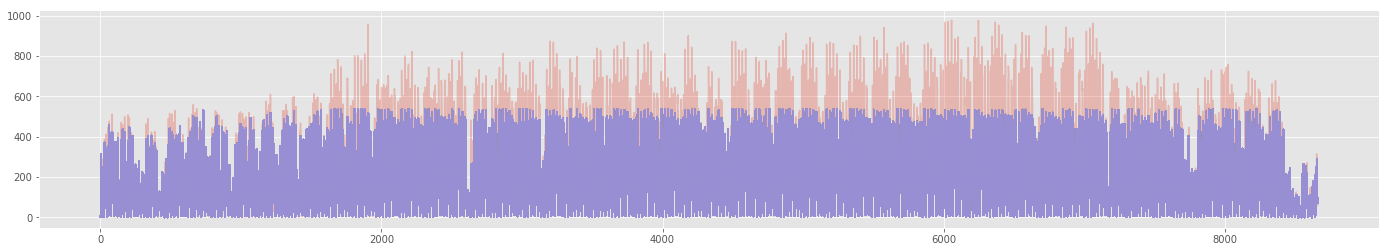

In [7]:
plt.style.use('ggplot')

fig, axes = plt.subplots(1, 1, figsize=(24,4))
axes.plot(range(len(format_data.y_test)), format_data.y_test, alpha=.3, c='C0')
axes.plot(range(len(format_data.y_test)), y_hat, alpha=.4, c='C2')
plt.savefig('/home/matheus/Desktop/' +str(pred_ahead) + '.png')
plt.show()

## Resultados

Para 1 hora a frente, conseguimos um EAM de 44.168 e uma REQM de 79.4  
Para 12 hora a frente, conseguimos um EAM de 95.43 e uma REQM de 137.62  
Para 24 hora a frente, conseguimos um EAM de 81.43 e uma REQM de 125.48  
